In [2]:
import numpy as np
import pandas as pd
import math
import itertools
from sklearn.neighbors import DistanceMetric
import networkx as nx
from numpy import inf


In [3]:
def getGraph(csv,measure) :
    
    # Uploading the files
    df = pd.read_csv(csv)
    df.head()
    df_cluster = df.iloc[:,1:13]
    
    # Converting the file into Graph
    dist = DistanceMetric.get_metric(measure)
    matrix_dist = dist.pairwise(df.to_numpy())
    Graph=nx.from_numpy_matrix(matrix_dist)
    draw_graph(Graph)
    
    return matrix_dist, Graph
    

In [4]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

In [5]:
def equation(x):
    s = 0.1
    function = math.exp(-1*(x)** 2)/ 2*s**2
    return function 
    

In [6]:
def getAjacency(matrix):
    adacency_matrix = []
    for row in matrix_dist:
        x = []
        for point in row:
            x.append(equation(point))
            adacency_matrix.append(x)
    print('adacency_matrix:')
    print(adacency_matrix)
   
    return adacency_matrix 

In [7]:
def getLaplacian(Graph,matrix_dist):
    D = Graph.degree()
    degrees = [val for (node, val) in Graph.degree()]
    D = np.zeros((len(degrees), len(degrees)))
    np.fill_diagonal(D, degrees)
    print('degree matrix:')
    print(D)
    L = D - matrix_dist
    LN = np.power(D,-0.5)* L* np.power(D,-0.5)
    print('laplacian matrix:')
    print(LN)
    return D,L,LN


In [8]:
def getEigen(LN):
    e, v = np.linalg.eig(LN)
        # eigenvalues
    print('eigenvalues:')
    print(e)
        # eigenvectors
    print('eigenvectors:')
    print(v)
    return e,v
    

C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


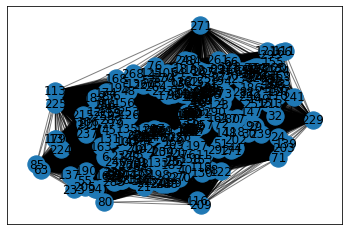

In [9]:
matrix_dist, Graph = getGraph("HeartFailure.csv","euclidean")

In [10]:
adjacency_matrix= getAjacency(matrix_dist)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
D,L,LN = getLaplacian(Graph,matrix_dist)

degree matrix:
[[298.   0.   0. ...   0.   0.   0.]
 [  0. 298.   0. ...   0.   0.   0.]
 [  0.   0. 298. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 298.   0.   0.]
 [  0.   0.   0. ...   0. 298.   0.]
 [  0.   0.   0. ...   0.   0. 298.]]
laplacian matrix:
[[  1. -inf -inf ... -inf -inf -inf]
 [-inf   1. -inf ... -inf -inf -inf]
 [-inf -inf   1. ... -inf -inf -inf]
 ...
 [-inf -inf -inf ...   1. -inf -inf]
 [-inf -inf -inf ... -inf   1. -inf]
 [-inf -inf -inf ... -inf -inf   1.]]


C:\Users\sitas\AppData\Local\Temp\ipykernel_21364\3042305999.py:9: RuntimeWarning: divide by zero encountered in power
  LN = np.power(D,-0.5)* L* np.power(D,-0.5)


In [ ]:
e,v = getEigen(LN)

In [ ]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

In [ ]:
U = np.array(v[:, i[0]])
km = KMeans(init='k-means++', n_clusters=3)
df['clusters'] = km.fit_predict(U)
df